This code is based on the Flow Down Slope notebook in the flowdownslope example. It contains quick analysis for the abyssal mixing case.

In [1]:
%pylab inline
import scipy.io.netcdf
import time
import matplotlib.gridspec as gridspec
from IPython import display

Populating the interactive namespace from numpy and matplotlib


In [2]:
# These next two lines add the MOM6-examples/tools/analysis/ directory to the search path for python packages
import sys
sys.path.append('../../tools/analysis/')
# m6toolbox is a python package that has a function that helps visualize vertical sections
import m6toolbox

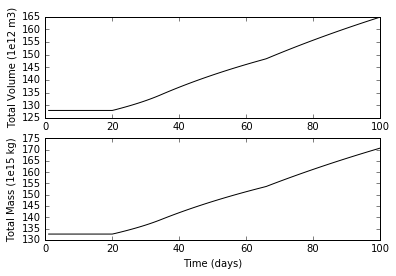

In [122]:
# Open the output:
fname = scipy.io.netcdf_file('prog.nc')
gname = scipy.io.netcdf_file('ocean_geometry.nc')

#Calculate total mass and volume:
zl = fname.variables['zl'][:]
h = fname.variables['h'][:,:,:,0]
A = gname.variables['Ah'][:]
volume = np.sum(np.dot(h,A[:,0]),axis=1)*len(A[0,:])
mass   = np.dot(np.dot(h,A[:,0]),zl)*len(A[0,:])
time = fname.variables['Time'][:]
plt.subplot(2,1,1)
plt.plot(time,volume/1e12,'-k')
plt.ylabel('Total Volume (1e12 m3)')
plt.subplot(2,1,2)
plt.plot(time,mass/1e15,'-k')
plt.ylabel('Total Mass (1e15 kg)')
plt.xlabel('Time (days)')

In [68]:
(volume[-1]-volume[0])/(time[-1]-time[0])/86400

1019936.2277152438

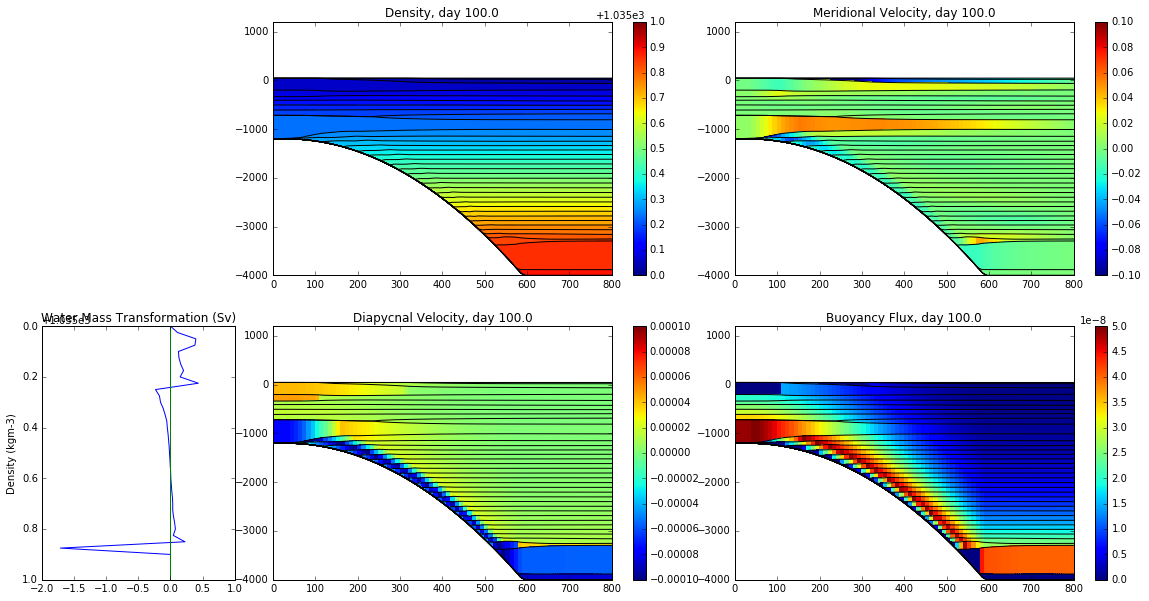

In [10]:
# Open the output:
fname = scipy.io.netcdf_file('prog.nc')
gname = scipy.io.netcdf_file('ocean_geometry.nc')

# Read the horizontal coordinate which is the same for all configurations 
yq = fname.variables['yq'][:] # This is the coordinate of the cell corners (u-points in 1D)
yq = numpy.concatenate(([0],yq)) # Inserts left most edge of domain in to coordinates
A = gname.variables['Ah'][:]
zi = fname.variables['zi'][:]

# Define a function to plot a section
def plot_section(file_handle, record, variable='zl', clim=(1035., 1036.), plot_grid=True, rep='linear'):
    """Plots a section of by reading vertical grid and scalar variable and super-sampling
    both in order to plot vertical and horizontal reconstructions.
    
    Optional arguments have defaults for plotting salinity and overlaying the grid.
    """
    e = file_handle.variables['e'][record,:,:,0] # Vertical grid positions
    if variable == 'zl':
        s = np.tile(file_handle.variables['zl'][:],(len(e[0,:]),1)).T
    else:
        s = file_handle.variables[variable][record,:,:,0] # Scalar field to color

    if (np.shape(s)[0]==np.shape(e)[0]):
        s = (s[1:,:]+s[:-1,:])/2 #NOTE THIS IS DODGY!
    y,z,q = m6toolbox.section2quadmesh(yq, e, s, representation=rep) # This yields three areas at twice the model resolution
    plt.pcolormesh(y, z, q);
    plt.clim(clim)
    if plot_grid: plt.plot(y, z.T, 'k', hold=True);
    plt.ylim(-4000,1200)
    plt.xlim(0,800)
    

record = -1 # record
fig = plt.figure(1, figsize=(20,10))
timevar = fname.variables['Time']
for record in [record]:
#for record in np.arange(0,len(timevar[:]),1):
    plt.clf()
    plt.subplot2grid((2,5),(1,0))
    eps = np.dot(fname.variables['wd'][record,:,:,0],A[:,0])*len(A[0,:])
    plt.plot(eps/1e6,zi); plt.plot(0*zi,zi); plt.gca().invert_yaxis(); plt.title('Water Mass Transformation (Sv)'); plt.ylabel('Density (kgm-3)')
    plt.xlim([-2, 1])
    plt.subplot2grid((2,5),(0,1),colspan=2)
    plot_section(fname, record, variable='zl', clim=(1035.0, 1036.0)); plt.title('Density, day {}'.format(timevar[record])); plt.colorbar()
    plt.subplot2grid((2,5),(0,3),colspan=2)
    plot_section(fname, record, variable='v', clim=(-0.1, 0.1)); plt.title('Meridional Velocity, day {}'.format(timevar[record])); plt.colorbar()
    plt.subplot2grid((2,5),(1,1),colspan=2)
    plot_section(fname, record, variable='wd', clim=(-0.0001, 0.0001)); plt.title('Diapycnal Velocity, day {}'.format(timevar[record])); plt.colorbar()
    plt.subplot2grid((2,5),(1,3),colspan=2)
    plot_section(fname, record, variable='buoyancy_flux', clim=(0.0, 5.0e-8)); plt.title('Buoyancy Flux, day {}'.format(timevar[record])); plt.colorbar()
    #plt.savefig('frame{:04d}'.format(record))

In [98]:
F = fname.variables['buoyancy_flux'][:,:,:,:]
h = fname.variables['h'][:,:,:,0]

In [5]:
2e6/800000/40000*100*86400

540.0

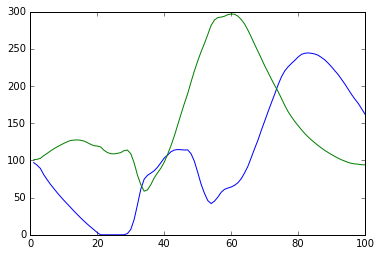

In [118]:
plt.plot(time,h[:,11,3]); plt.plot(time,h[:,10,3])

(100, 40, 80)

In [103]:
np.min(h[0,:,:],axis=1)

array([  1.04018967e+02,   8.96759481e+01,   9.98849061e+01,
         9.98773880e+01,   9.98551171e+01,   9.98247311e+01,
         9.97881827e+01,   9.97439118e+01,   9.96962658e+01,
         9.97221446e+01,   9.97066349e+01,   9.01493800e+01,
         1.00000000e-10,   1.00000000e-10,   1.00000000e-10,
         1.00000000e-10,   1.00000000e-10,   1.00000000e-10,
         1.00000000e-10,   1.00000000e-10,   1.00000000e-10,
         1.00000000e-10,   1.00000000e-10,   1.00000000e-10,
         1.00000000e-10,   1.00000000e-10,   1.00000000e-10,
         1.00000000e-10,   1.00000000e-10,   1.00000000e-10,
         1.00000000e-10,   1.00000000e-10,   1.00000000e-10,
         1.00000000e-10,   1.00000000e-10,   1.00000000e-10,
         1.00000000e-10,   1.00000000e-10,   1.00000000e-10,
         1.00000000e-10])